# Penguin Dataset - Basic Klassification Methods

## Dataset  

In [49]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#Racing Bar Chart
!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

# Disable warnings 
import warnings
warnings.filterwarnings('ignore') 

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [50]:
# importing dataset
df = pd.read_csv('penguins.csv')


In [51]:
df.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


The dataset consists of 5 columns.

    + culmen_length_mm: culmen length (mm)
    + culmen_depth_mm: culmen depth (mm)
    + flipper_length_mm: flipper length (mm)
    + body_mass_g: body mass (g)
    + species: penguin species (Chinstrap, Adélie, or Gentoo)



In [53]:
print(df.shape)

(344, 5)


In [54]:
# checking if there are missing values
df.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [55]:
# Handling missing values
from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)

In [56]:
# checking if there are missing values after handling missing values
df.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [57]:
# counting values in categories "Species"
df['Species'].value_counts()

0.0    152
1.0    124
2.0     68
Name: Species, dtype: int64

The number of observations in each class is not equal.

# Visualizations

In [58]:
df['Species'].value_counts().iplot(kind='bar')

<AxesSubplot:>

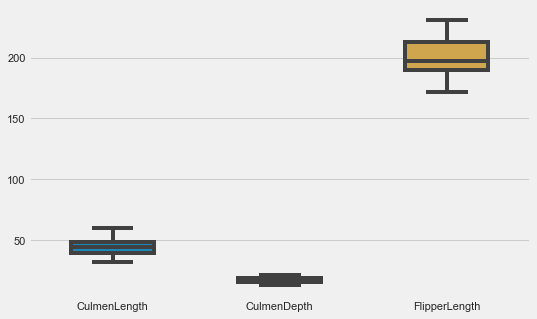

In [59]:
df1 = df[['CulmenLength', 'CulmenDepth','FlipperLength']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

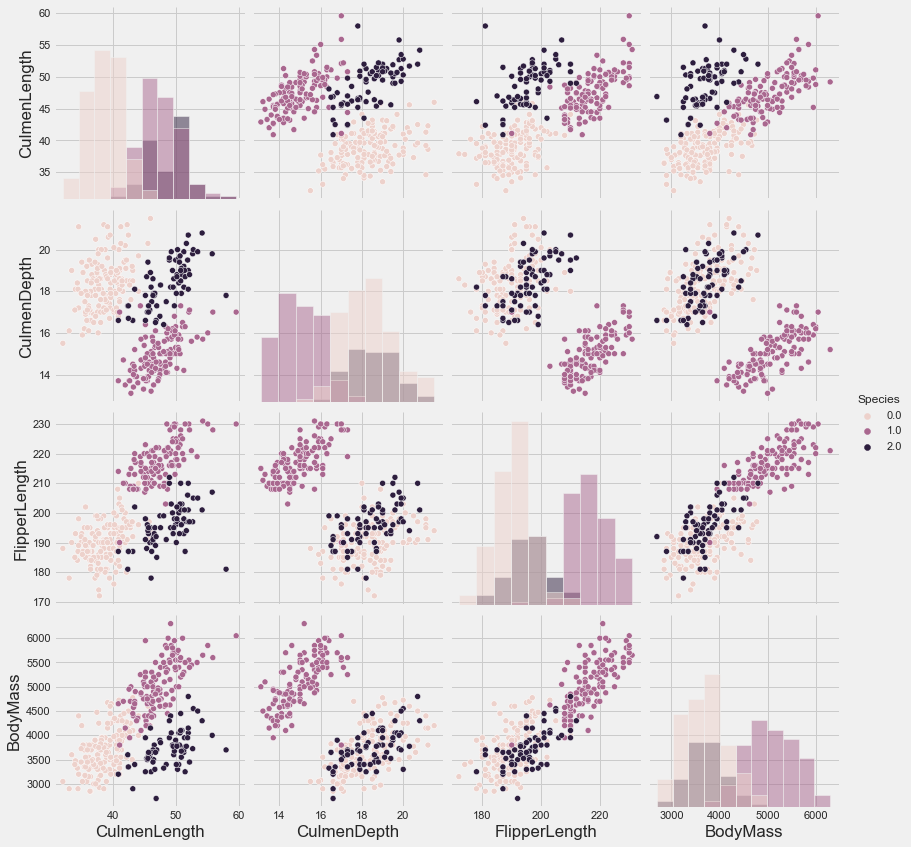

In [60]:
# Visualization of correlations
sns.pairplot(df, hue="Species", size=3,diag_kind="hist")

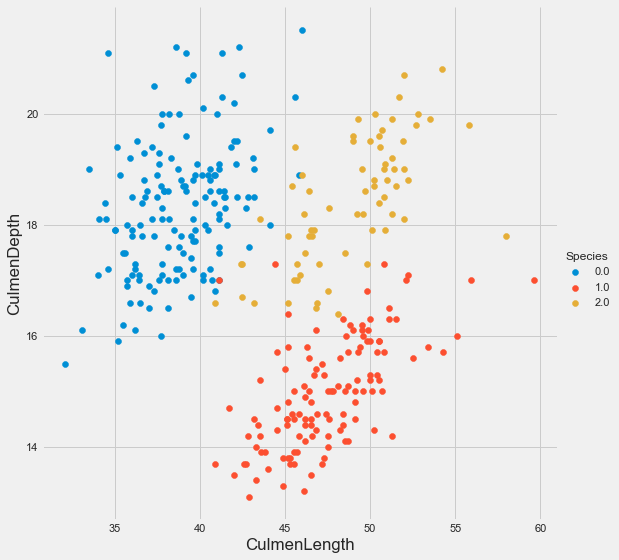

In [44]:
# Scatter plot: "CulmenLength" vs "CulmenDepth"
sns.FacetGrid(df, hue="Species", size=8) \
   .map(plt.scatter, "CulmenLength", "CulmenDepth") \
   .add_legend()


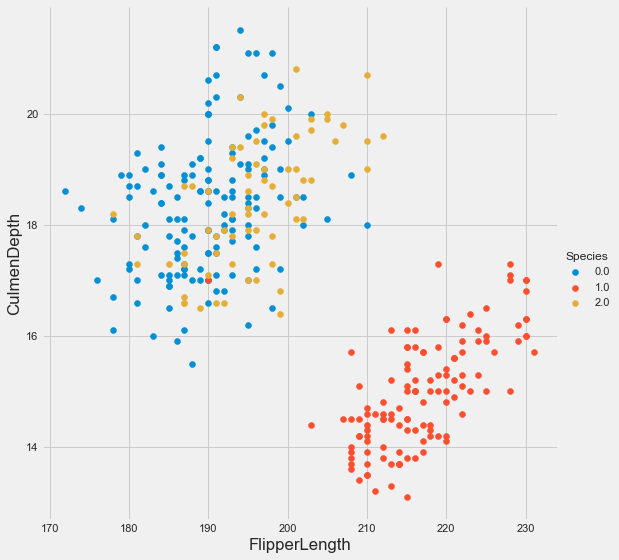

In [45]:
# Scatter plot: "CulmenDepth" vs "FlipperLength"
sns.FacetGrid(df, hue="Species", size=8) \
   .map(plt.scatter, "FlipperLength", "CulmenDepth") \
   .add_legend()


# Classificators

## Train and test sets 

In [63]:
from sklearn.model_selection import train_test_split
features = ["FlipperLength", "CulmenDepth", "CulmenLength","BodyMass"]
target = 'Species'
X, y = df[features], df[target]
print('X:')
display(X)
print('\ny:')
display(y)



X:


,FlipperLength,CulmenDepth,CulmenLength,BodyMass
0,181.0,18.7,39.1,3750.0
1,186.0,17.4,39.5,3800.0
2,195.0,18.0,40.3,3250.0
3,190.0,17.0,41.1,3800.0
4,193.0,19.3,36.7,3450.0
...,...,...,...,...
339,207.0,19.8,55.8,4000.0
340,202.0,18.1,43.5,3400.0
341,193.0,18.2,49.6,3775.0
342,210.0,19.0,50.8,4100.0



y:


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
339    2.0
340    2.0
341    2.0
342    2.0
343    2.0
Name: Species, Length: 344, dtype: float64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X[['CulmenLength','BodyMass']], y, test_size=0.30, random_state=0, stratify=y)
print ('Training observations: %d\nTesting observations: %d' % (X_train.shape[0], X_test.shape[0]))

Training observations: 240
Testing observations: 104


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)


In [78]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()



## Logistic regression

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/


In [118]:
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
model_lr = LogisticRegression(multi_class='ovr')
model_lr.fit(X_train_standardized, y_train)
predictions_lr = model_lr.predict(X_test_standardized)

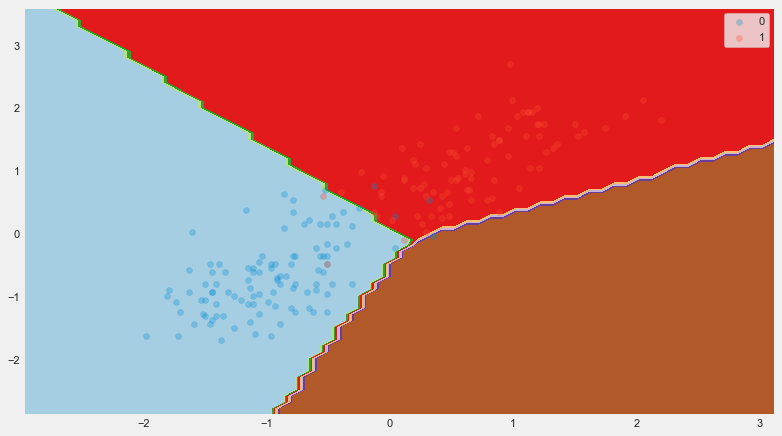

In [80]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr,average='weighted'))
print("Recall:", recall_score(y_test, predictions_lr,average='weighted'))
print("F1_score:", f1_score(y_test, predictions_lr,average='weighted'))

Accuracy:  0.9423076923076923
Precision: 0.9433760683760684
Recall: 0.9423076923076923
F1_score: 0.9424748854801958


##  KNN

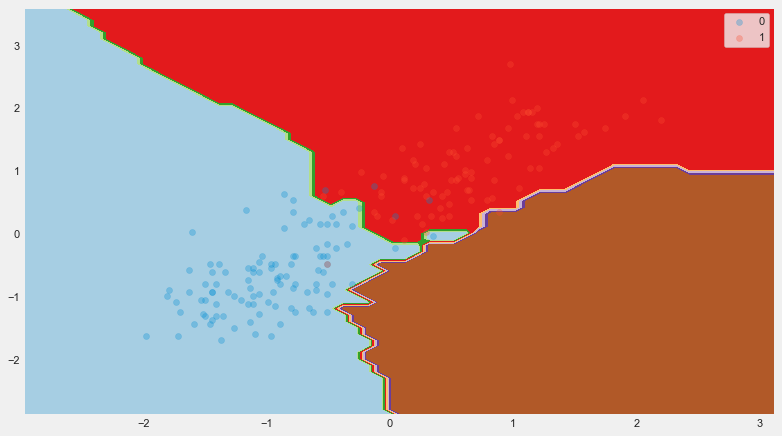

In [94]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 3)
model_knn.fit(X_train_standardized, y_train)
predictions_knn = model_knn.predict(X_test_standardized)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_knn)

In [95]:
print('Accuracy: ', accuracy_score(y_test, predictions_knn))
print("Precision:", precision_score(y_test, predictions_knn,average='weighted'))
print("Recall:", recall_score(y_test, predictions_knn,average='weighted'))
print("F1_score:", f1_score(y_test, predictions_knn,average='weighted'))

Accuracy:  0.9423076923076923
Precision: 0.9433608058608058
Recall: 0.9423076923076923
F1_score: 0.9423872522276777


##  Decision tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_train, y_train)
predictions_tree = model_tree.predict(X_test_standardized)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_tree)

In [98]:
print('Accuracy: ', accuracy_score(y_test, predictions_tree))
print("Precision:", precision_score(y_test, predictions_tree,average='weighted'))
print("Recall:", recall_score(y_test, predictions_tree,average='weighted'))
print("F1_score:", f1_score(y_test, predictions_tree,average='weighted'))

Accuracy:  0.4423076923076923
Precision: 0.19563609467455623
Recall: 0.4423076923076923
F1_score: 0.27128205128205124


## Support Vector Machines 

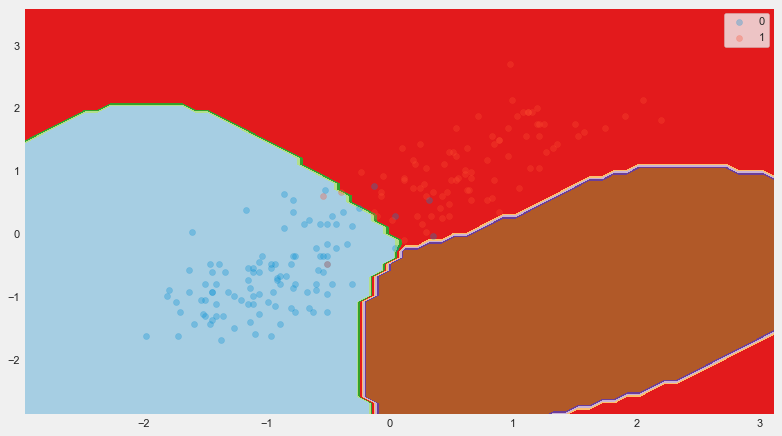

In [115]:
from sklearn.svm import SVC

model_svm = SVC(decision_function_shape='ovo')
model_svm.fit(X_train_standardized, y_train)
predictions_svm = model_svm.predict(X_test_standardized)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_svm)

In [116]:
print('Accuracy: ', accuracy_score(y_test, predictions_svm))
print("Precision:", precision_score(y_test, predictions_svm,average='weighted'))
print("Recall:", recall_score(y_test, predictions_svm,average='weighted'))
print("F1_score:", f1_score(y_test, predictions_svm,average='weighted'))

Accuracy:  0.9519230769230769
Precision: 0.9525368248772504
Recall: 0.9519230769230769
F1_score: 0.9520642942161431


## Random forest 

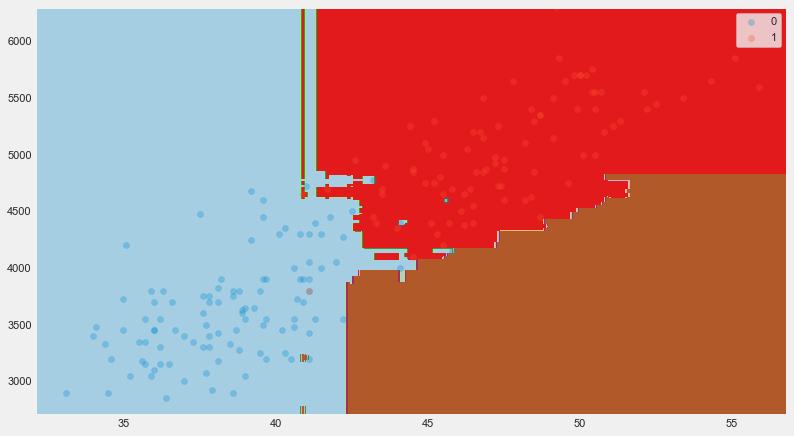

In [105]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)
predictions_forest = model_forest.predict(X_test_standardized)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_forest)

In [106]:
print('Accuracy: ', accuracy_score(y_test, predictions_forest))
print("Precision:", precision_score(y_test, predictions_forest,average='weighted'))
print("Recall:", recall_score(y_test, predictions_forest,average='weighted'))
print("F1_score:", f1_score(y_test, predictions_forest,average='weighted'))

Accuracy:  0.4423076923076923
Precision: 0.19563609467455623
Recall: 0.4423076923076923
F1_score: 0.27128205128205124


## AdaBoost 

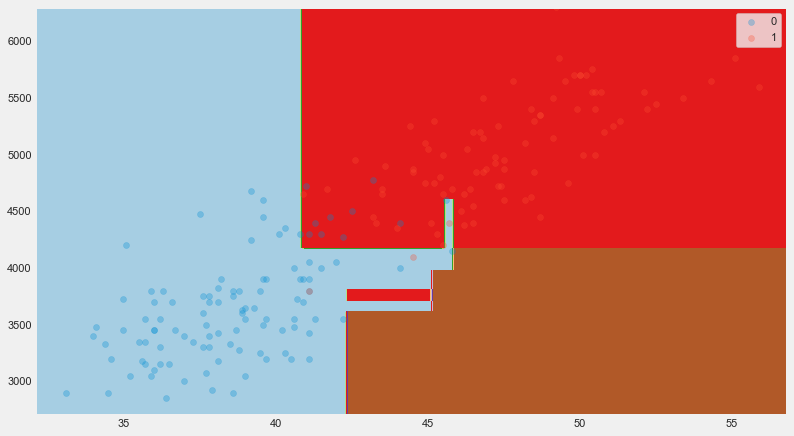

In [107]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)
predictions_ada = model_adaboost.predict(X_test_standardized)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_adaboost)

In [108]:
print('Accuracy: ', accuracy_score(y_test, predictions_ada))
print("Precision:", precision_score(y_test, predictions_ada,average='weighted'))
print("Recall:", recall_score(y_test, predictions_ada,average='weighted'))
print("F1_score:", f1_score(y_test, predictions_ada,average='weighted'))

Accuracy:  0.4423076923076923
Precision: 0.19563609467455623
Recall: 0.4423076923076923
F1_score: 0.27128205128205124


##  Ensembling

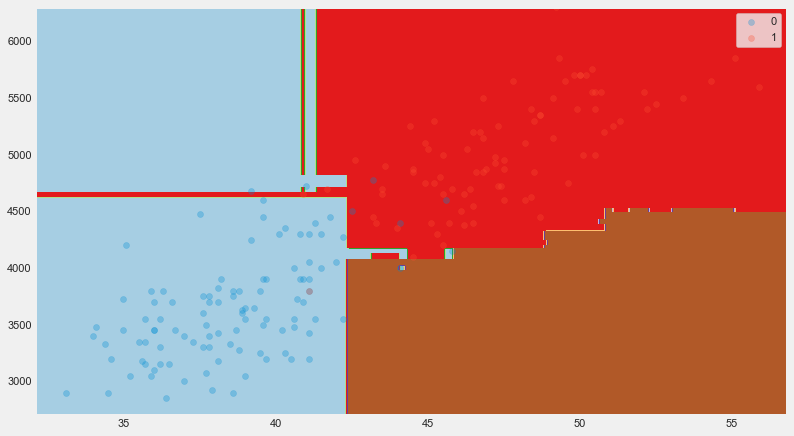

In [111]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
predictions_ens = model_adaboost.predict(X_test_standardized)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_voting)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, predictions_ens))
print("Precision:", precision_score(y_test, predictions_ens,average='weighted'))
print("Recall:", recall_score(y_test, predictions_ens,average='weighted'))
print("F1_score:", f1_score(y_test, predictions_ens,average='weighted'))